## *Pytorch para Deep Learning*

O código abaixo é baseado no capítulo 3 do curso/livro on-line "Zero to Mastery Learn PyTorch for Deep Learning", disponível em <https://www.learnpytorch.io/>

## 03. PyTorch Computer Vision

Neste capítulo, o problema a ser analisado é o de visão computacional, ou seja, o de ensinar uma rede neural a entender como classificar, detectar ou segmentar as imagens que são apresentadas a ele.

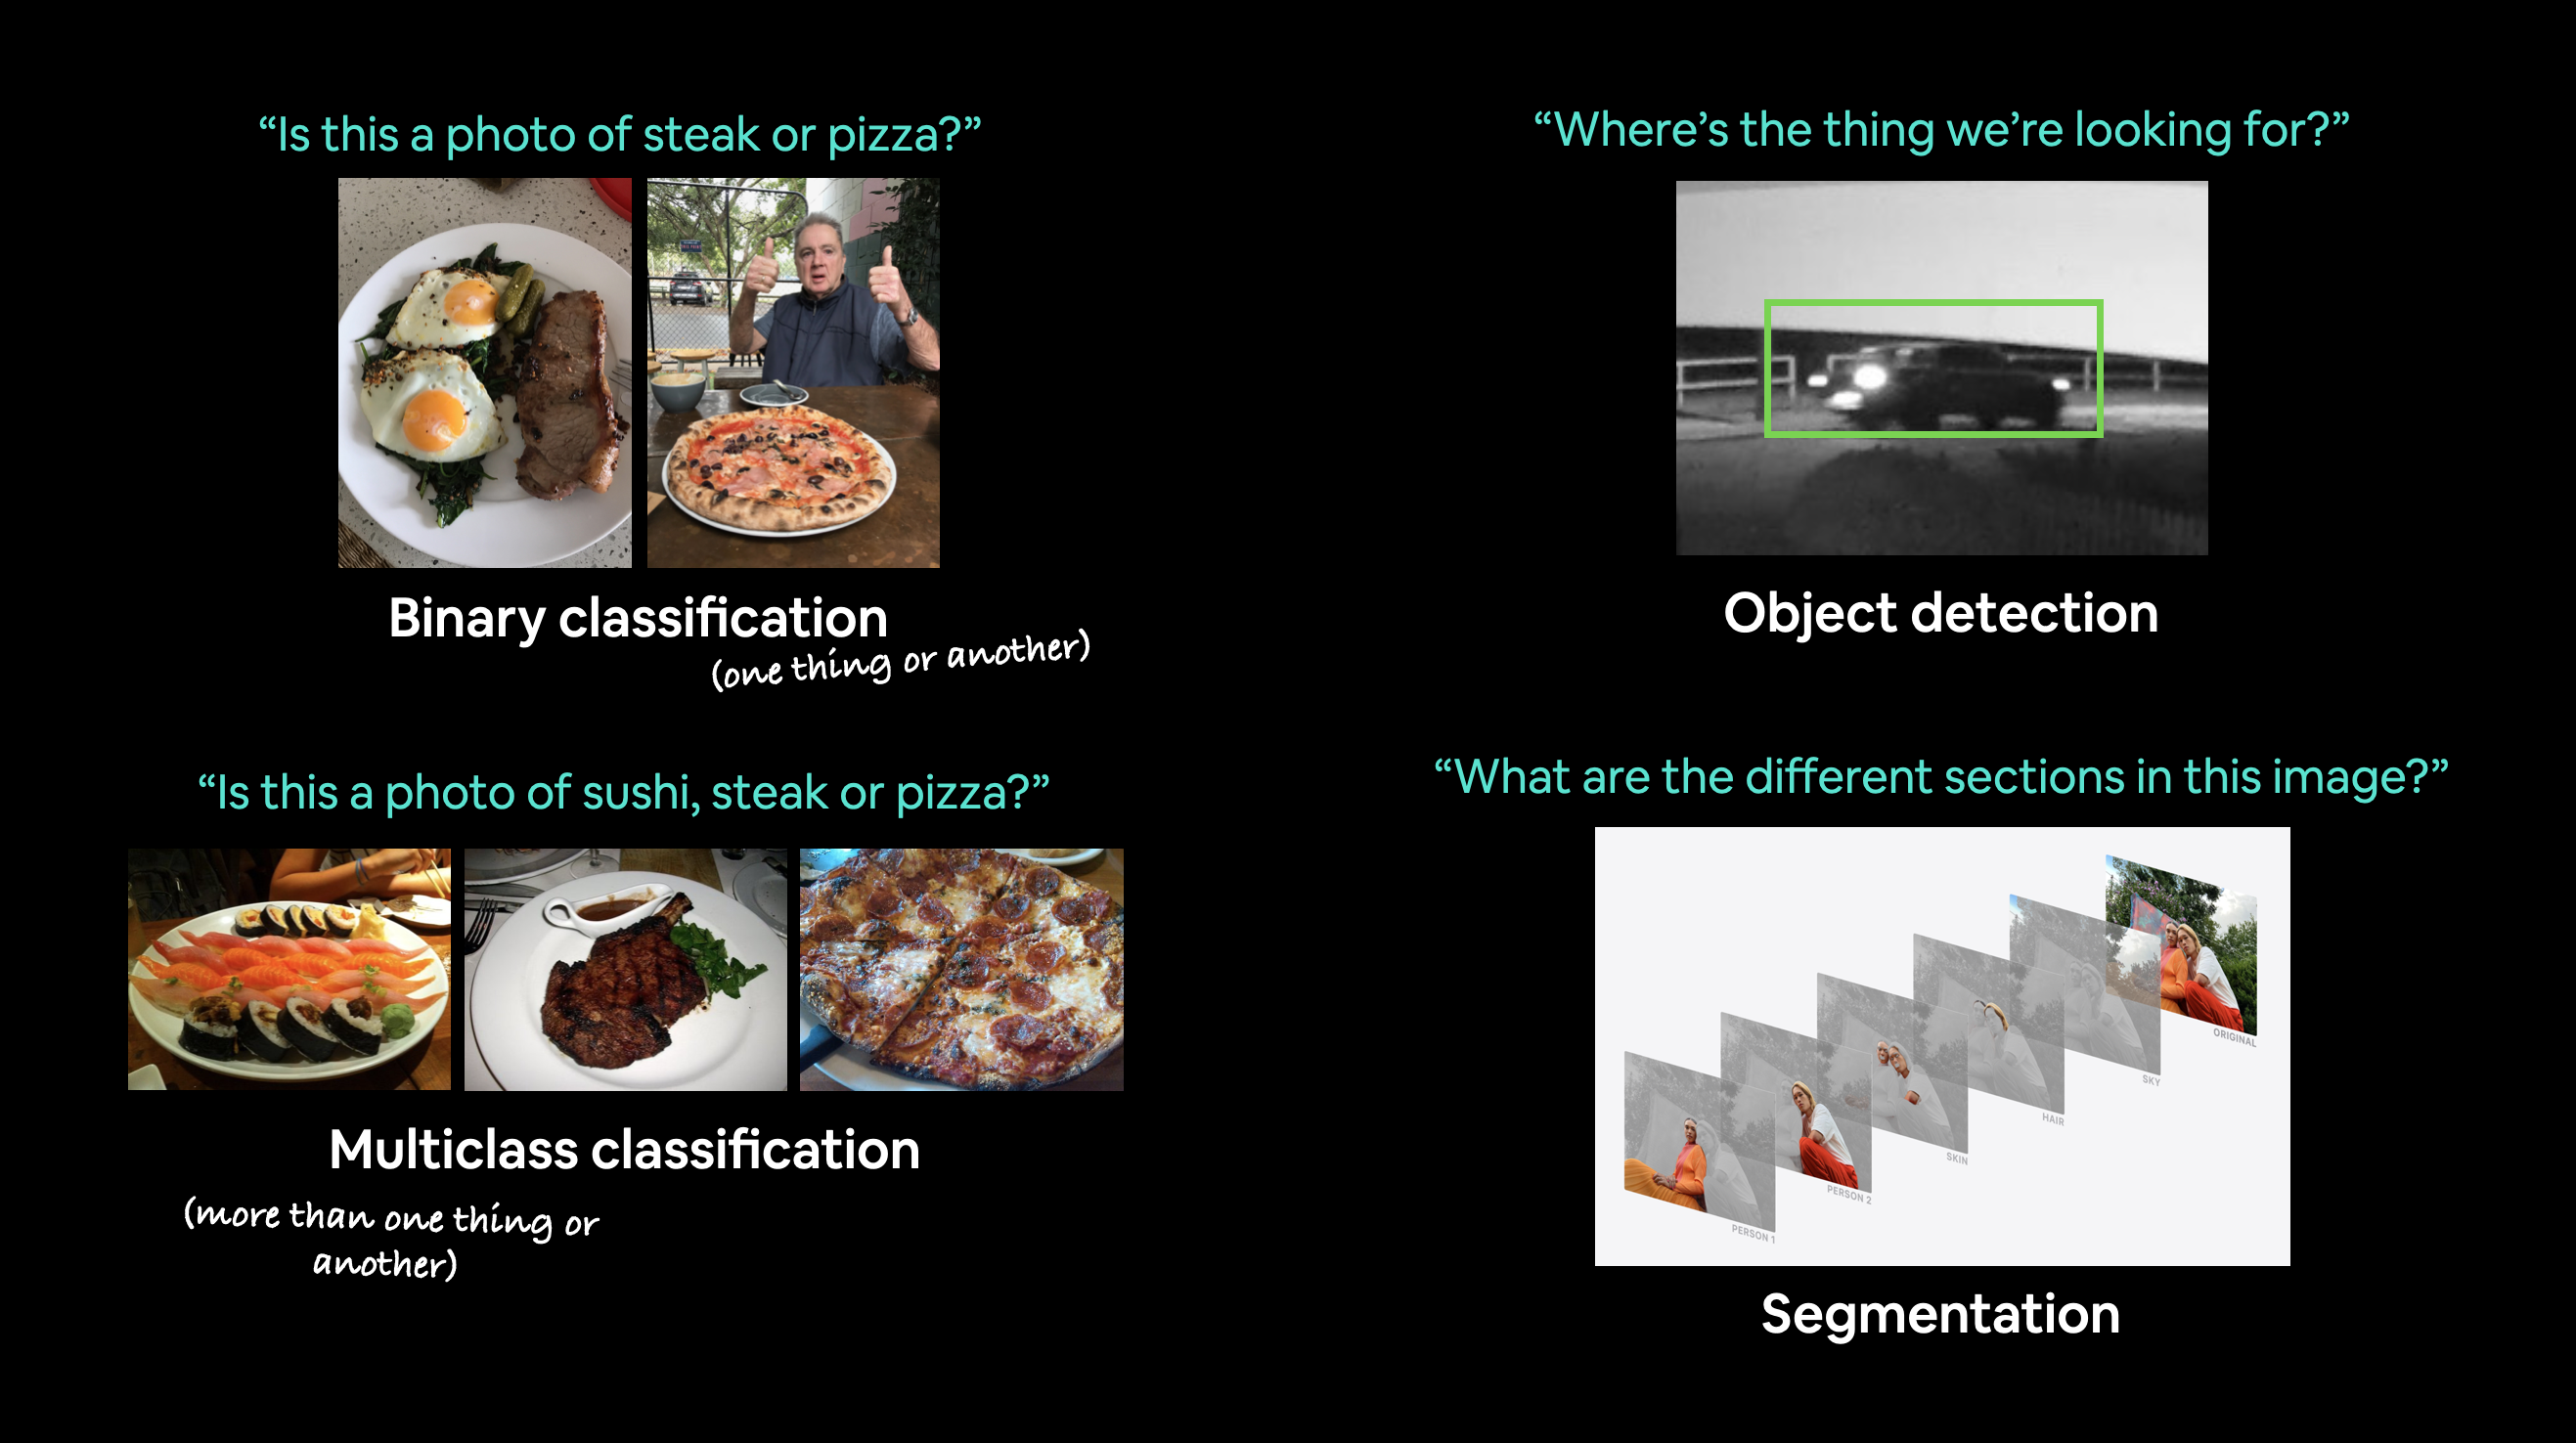

*0. Bibliotecas de visão computacional no PyTorch*

Primeiramente, algumas bibliotecas em PyTorch que tratam de visão computacional são apresentadas.

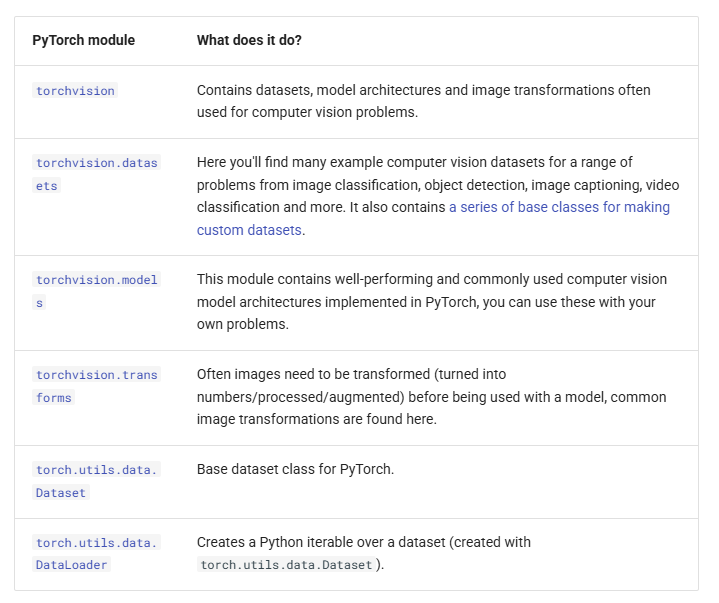

In [1]:
# importo PyTorch
import torch
from torch import nn

# importo torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# importo matplotlib para visualização
import matplotlib.pyplot as plt

# confiro as versões
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


*01. Conseguindo o dataset*

O conjunto de dados FashionMNIST será utilizado para o treinamento da rede neural.

In [2]:
# baixando e configurando os dados de treino
train_data = datasets.FashionMNIST(
    root="data", # de onde baixar os dados?
    train=True, # baixar os dados de treino
    download=True, # fazer o download dos dados caso eles não existam
    transform=ToTensor(), # transformar as imagens de PIL (formato original) para tensores
    target_transform=None # não transformar os labels das imagens
)

# baixando e configurando os dados de teste
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # se os dados não são de treino, logo, eles são de teste
    download=True,
    transform=ToTensor()
)

In [ ]:
# vejo uma amostra inicial dos dados de treino
image, label = train_data[0]
print(f"image: {image} \n\nlabel: {label}")

image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

In [4]:
# qual é o formato da imagem acima?
image.shape

torch.Size([1, 28, 28])

O saída acima significa que a imagem possui apenas um canal de cor/color channel (ou seja, é em tons de cinza). Além disso, tem 28 pixels de altura e 28 de largura, totalizando 784 pixels em tons de cinza. A essa ordem de organizar os dados no tensor, dá-se o nome de CHW (color channels, height, width), mas há um debate a respeito de se o canal de cor não deveria vir por último no tensor (formato esse chamado de HWC).

Há também uma variação do formato acima, chamada de NCHW (com o color channel no início), em que N significa o número de imagens em um batch. Para o PyTorch, o formato NHWC (com o color channel por último) performa melhor e é considerdo uma boa prática na área.

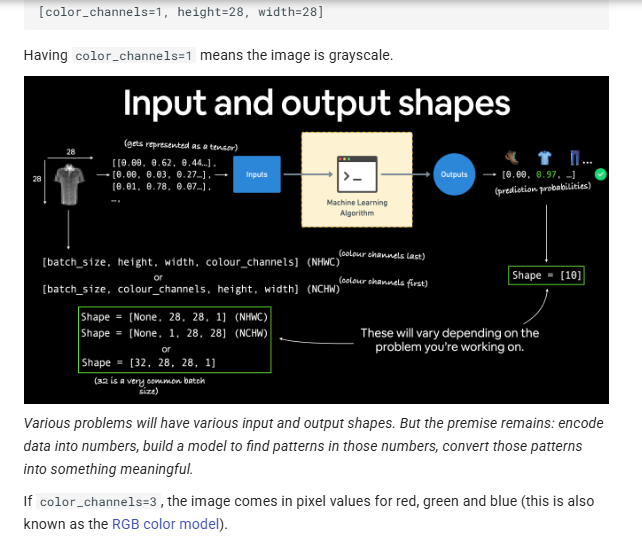

In [5]:
# quantas amostras há em cada conjunto de treino e teste?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets) # ou seja, há 60 mil amostras de treino supervisionado e 10 mil amostras de teste supervisionado

(60000, 60000, 10000, 10000)

In [ ]:
# quais classes existem nos dados?
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


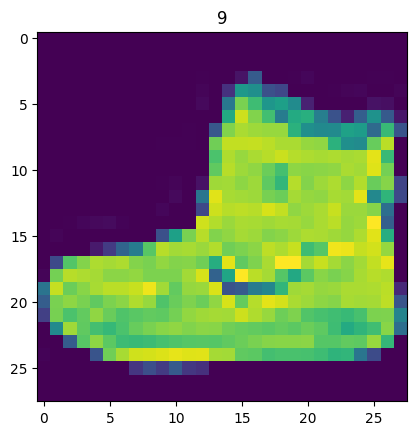

In [67]:
# visualizando os dados
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # a instância colormap (cmap) do comando imshow tem o valor "viridis" por padrão, o que transforma a imagem (originalmente em preto e branco) em colorida
plt.title(label);

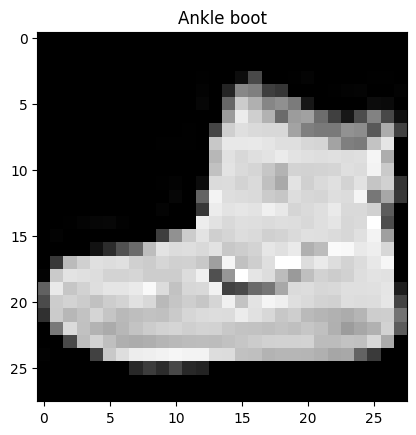

In [68]:
# quando cmap é ajustado para gray, a imagem retorna as suas cores originais nesse caso
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

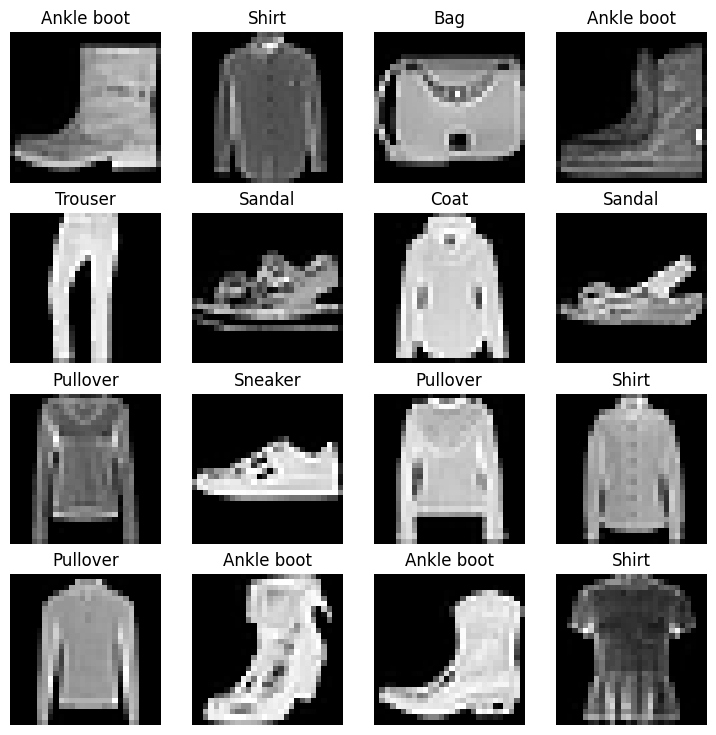

In [9]:
# ploto mais imagens
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1): # o 1 é o início da contagem (inclusivo); ela vai até 17 (não inclusivo)
    random_idx = torch.randint(0, len(train_data), size=[1]).item() # gero um índice aleatório dentro do intervalo [0, len(train)_data)
    img, label = train_data[random_idx] # random_idx é utilizado para indexar uma imagem e label presente no dado de treino
    fig.add_subplot(rows, cols, i) # cria um subgráfico dentro do gráfico de tamanho rows * cols, na posição determinada por i (ou seja, a cada iteração, uma imagem é colocada sequencialmente)
    plt.imshow(img.squeeze(), cmap="gray") # a imagem determinada por random_idx é plotada
    plt.title(class_names[label])
    plt.axis(False)

*2. Prepare o DataLoader*

O DataLoader ajuda a carregar os dados, que são separados em porções/batches para facilitar o treinamento do modelo 

In [10]:
from torch.utils.data import DataLoader

# configuro o hiperparâmetro referente ao tamanho do batch
BATCH_SIZE = 32

# transformo o conjunto de dados de treino e teste em iterables (batches)
train_dataloader = DataLoader(train_data, # conjunto de dados a ser utilizado como iterable
                              batch_size=BATCH_SIZE, # quantas amostras por batch?
                              shuffle=True # embaralhar os dados a cada época? (acredito que seja útil para evitar overfitting)
                              )
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False # não necessariamente é preciso embaralhar os dados de teste
                             )

# confiro o que foi criado
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fbc0c5582c0>, <torch.utils.data.dataloader.DataLoader object at 0x7fbc0e163500>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# confiro o que está dentro do dataloader de treino
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape 
# o resultado é (32, 1, 28, 28) e (32), respectivamente; ou seja, há 32 imagens com 1 canal de cor e 28 pixels de altura por 28 de largura;
# há também 32 rótulos associados a essas imagens

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Label: 6
Label: 6, label size: torch.Size([])


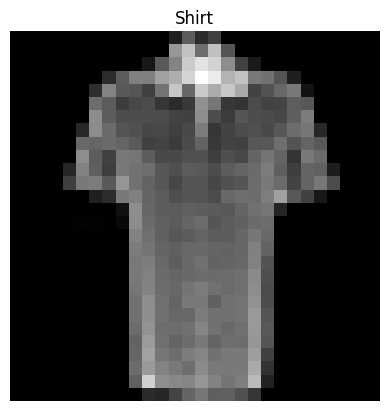

In [12]:
# mostro uma amostra do que há dentro do dataloader de treino, para ver se os dados estão de fato intocados
torch.manual_seed(42)
random_idx = torch.randint(0, BATCH_SIZE, size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Label: {label}")
print(f"Label: {label}, label size: {label.shape}")


*3. Model 0: Construa um modelo de ponto de partida*

In [13]:
# construo uma camada achatadora
flatten_model = nn.Flatten() # todos os módulos nn funcionam como um modelo, ou seja, podem fazer forward pass

# pego uma única amostra do batch de treino
x = train_features_batch[0]

# aplico a camada achatadora a uma amostra
output = flatten_model(x) # performa forward pass

# imprimo o que ocorreu
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [14]:
# construo o modelo inicial
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__ (self, input_shape: int, hidden_units: int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # isso é feito em primeiro passo, pois as camadas nn.linear esperam um tensor 1D
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape) 
        )

    def forward(self, x):
         return self.layer_stack(x) # aplicando as camadas definidas acima

In [15]:
# configurando o modelo com os hiperparâmetros
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, # um para cada pixel da imagem, 28*28
                              hidden_units=10, # número de neurônios na camada escondida
                              output_shape=len(class_names)) # um neurônio de saída para cada classe
model_0.to("cpu") # como estamos no início, não há necessidade de utilizar a GPU

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
import requests
from pathlib import Path

# download do arquivo de funções auxiliares para loss function, optimizer e métricas de avaliação (se elas ainda não tiverem sido baixadas)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open ("helper_functions.py", "wb") as file:
     file.write(request.content)

helper_functions.py already exists, skipping download


In [17]:
# importo as métricas de acurácia
from helper_functions import accuracy_fn

# configuração da loss function, optimizer e métricas de avaliação 
loss_fn = nn.CrossEntropyLoss() # função de loss para problemas de classificação multiclasse
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [18]:
# função para marcar o tempo de treinamento com CPU e GPU (se disponível)
from timeit import default_timer as timer
def print_train_time(start:float, end: float, device: torch.device = None):
    """
    Imprime a diferença entre o tempo de entrada e saída

    Argumentos:
        start: tempo de início
        end: tempo de fim
        device: dispositivo utilizado (CPU ou GPU). O padrão é None

    Retorna:
        float: tempo entre o início e fim da computação em segundos (quanto maior o tempo, mais lento o processo)
    """

    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds") # precisão de 3 casas decimais
    return total_time

In [19]:
# importo tqdm para a barra de progresso
from tqdm.auto import tqdm

# configuro a seed e inicializo o temporizador
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# configuro o número de épocas (quantas vezes o modelo verá todos os dados) -> no momento, será pouco para agilizar o treinamento
epochs = 3

# teste pessoal -> crio listas vazias para guardar valores que serão utilizados para plotar um gráfico da taxa de aprendizado do modelo
epoch_count = []
train_loss_values = []
test_loss_values = []

# crio o loop de treinamento e teste
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Treino
    train_loss = 0 # preciso zerar a loss a cada época, pois ele acumula ao longo do treinamento
    # adiciono um loop para iterar sobre cada batch de treino
    for batch, (X, y) in enumerate(train_dataloader): # X representa os features e y, os labels; batch é uma variável criada para armazenar o índice da interação atual, disponibilizada por enumerate
        model_0.train() # garanto que o modelo está no modo de treino
        # Passo 1: Forward pass
        y_pred = model_0(X) # passo a amostra de treino para o modelo
        
        # Passo 2: Calcular a loss por batch
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # adiciono a loss do batch à loss total
        
        # Passo 3: Zerar os gradientes do otimizador
        optimizer.zero_grad()

        # Passo 4: Back propagation
        loss.backward()

        # Passo 5: Atualizar os pesos por meio de SGD
        optimizer.step()

        # imprimo quantas amostras já foram vistas até então
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


    # cálculo da loss média por época (train loss total dividido pelo tamanho do dataloader de treino)
    train_loss /= len(train_dataloader)

    ### Teste
    # a parte de teste deve ser feita em um loop interno separado do de treino, pois é somente quando todos os dados presente no batch sendo analisado são treinados que eles podem ser testados
    # senão, a cada treino de uma porção do dado, o modelo seria testado com essa mesma porção, o que não resultaria em uma avaliação correta, já que os pesos seriam reavaliados a todo momento 

    test_loss, test_acc = 0, 0 # variáveis cumulativas para a loss e acurácia de teste
    model_0.eval() # garanto que o modelo está no modo de avaliação
    with torch.inference_mode():
        for X, y in test_dataloader: # para cada dado de feature(X) e label(y) presente no batch de teste
            # Passo 1: Forward pass
            test_pred = model_0(X)

            # Passo 2: Calcular o loss por batch (acumulativamente)
            test_loss += loss_fn(test_pred, y)

            # Passo 3: Calcular a acurácia por batch (acumulativamente, preds precisa ser do mesmo jeito que y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # cálculo da loss média do teste por época (é necessário que esse cálculo aconteça dentro de torch.inference_mode())
        test_loss /= len(test_dataloader) # total do loss dividido pelo número de batches

        # divido o total da acurácia pela quantidade de batches no dataloader para obter a acurácia média
        test_acc /= len(test_dataloader)
    
    # imprimo os resultados de cada época
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test accuracy: {test_acc:.2f}%\n")
    # teste pessoal para guardar as variáveis com o objetivo de fazer um gráfico da taxa de aprendizado do modelo
    epoch_count.append(epoch)
    train_loss_values.append(train_loss)
    test_loss_values.append(test_loss)


# finalizo o temporizador e calculo o tempo total de treinamento
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test accuracy: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test accuracy: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test accuracy: 83.43%

Train time on cpu: 58.458 seconds


*4. Fazendo predições e conseguindo resultados para o Modelo 0*

A partir de agora, uma função será usada para treinar e avaliar o modelo. Abaixo, está a função que avaliará o Model 0, realizando as mesmas operações feitas dentro do inference mode.

In [20]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Retorna um dicionário contendo os resultados da predição do modelo

    Args:
        model: um modelo de PyTorch capaz de fazer predições a respeito dos dados
        data_loader: o conjunto de dados alvo que será utilizado para fazer a predição
        loss_fn: a função de loss do modelo
        accuracy_fn: a função de acurácia do modelo

    Retorna:
        dict: um dicionário contendo os resultados da predição do modelo com base no dataloader
    """

    # repito os passos presentes no loop de treino do model 0
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X) # faço as predições com o modelo
            loss += loss_fn(y_pred, y) # calculo a loss por meio da comparação do y predito com o y real/esperado
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # dim 1 é utilizada para pegar o maior valor ao longo do eixo específicado; no caso, o eixo é uma coluna do batch, não o batch inteiro

        # calculo a loss média e a acurácia média
        loss /= len(data_loader)
        acc /= len(data_loader)

    # retorno o dicionário com os resultados -> útil para guardar os resultados e compará-los futuramente com outros modelos
    return{"model_name": model.__class__.__name__, # funciona apenas quando o modelo foi criado com uma classe
           "model_loss": loss.item(),
           "model_acc": acc}

# cálculo dos resultados do modelo 0 no conjunto de teste
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

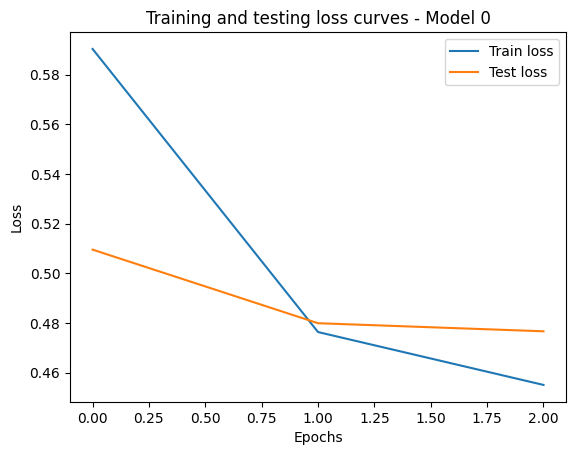

In [21]:
# teste pessoal para ver a curva de aprendizado do modelo
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and testing loss curves - Model 0")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Com base no resultado do Modelo 0 e do gráfico acima, é possível perceber que apesar da acurácia dos testes no modelo ter sido relativamente alta (83.43%), no quadro geral o modelo está tendo um comportamento de overfitting (ou seja, está ficando muito acostumado com os dados vistos), pois enquanto o loss de treino diminui, o loss de teste estabiliza. Tal situação não é a ideal e requer que melhoremos o modelo.

*5. Configurando código que é device-agnostic (para usar em uma GPU quando possível)*

In [22]:
# configurando o código device-agostic
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

*6. Model 1: Construindo um modelo melhor com não-linearidade*

In [23]:
# criando um modelo com camadas não-lineares e lineares
class FashionMNISTModelV1(nn.Module):
    def __init__ (self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__() # inicializo a classe pai, mantendo as propriedades/funcionalidades dela enquanto extendo o comprtamento do construtor
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [24]:
# crio uma instância do modelo 1, com os mesmos hiperparâmetros do modelo 0, para testar o quão bem a nova combinação de camadas se sai
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # mando o modelo para o dispositivo desejado/disponível
next(model_1.parameters()).device # verifico se o modelo foi de fato enviado para o dispositivo correto

device(type='cpu')

In [25]:
# estabeleço a loss function, o otimizador e as métricas de avaliação
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)

In [26]:
# crio funções que guardam os loops de treino e teste do modelo 1
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn: accuracy_fn,
               device: torch.device = device):
    # inicializo as variáveis de loss e acurácia e envio o modelo para o dispositivo disponível
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(data_loader): # a ordem aqui é crucial, pois batch recebe o índice da interação e (X, y) recebe o *par* de feature/label retornado por data_loader
        # envio os dados para a GPU, se existir
        X, y = X.to(device), y.to(device)

        # Passo 1: Forward pass
        y_pred = model(X)

        # Passo 2: Calcular a loss por batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Passo 3: Zerar os gradientes do otimizador
        optimizer.zero_grad()

        # Passo 4: Back propagation
        loss.backward()

        # Passo 5: Atualizar os pesos por meio de SGD
        optimizer.step()

    # cálculo da loss e acurácia médias (por época)
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return train_loss, train_acc  # retorno os valores de perda e acurácia
    
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn, # não contém o otimizador, pois é o loop de teste
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            # Passo 1: Forward pass
            test_pred = model(X)

            # Passo 2: Cálculo da loss e da acurácia
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # cálculo da loss e acurácia médias (por época)
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
    return test_loss, test_acc  # Retorne os valores de perda e acurácia

In [27]:
# irei treinar o modelo1 e ver quanto tempo gasta
torch.manual_seed(42)

# teste pessoal -> crio listas vazias para guardar valores que serão utilizados para plotar um gráfico da taxa de aprendizado do modelo
epoch_count = []
train_loss_values = []
test_loss_values = []

# inicio o temporizador
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)): # começo o loop de treino e teste
    print(f"Epoch: {epoch}\n-------")
    
    train_loss, train_acc = train_step(data_loader=train_dataloader, model=model_1, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
    test_loss, test_acc = test_step(test_dataloader, model_1, loss_fn, accuracy_fn)
     # teste pessoal para guardar as variáveis com o objetivo de fazer um gráfico da taxa de aprendizado do modelo
    epoch_count.append(epoch)
    train_loss_values.append(train_loss.detach().numpy()) # como o loop de teste vem imediatamente após o de treino, a train_loss da época atual já foi calculada
    test_loss_values.append(test_loss.detach().numpy())

# finalizo o temporizador e calculo o tempo total de treinamento
train_time_end_on_gpu = timer()
total_train_time_model1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95637 | Test accuracy: 65.00%

Epoch: 1
-------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
-------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on None: 56.869 seconds


In [28]:
# crio uma função eval_model para avaliar o modelo 1, levando em consideração o código device-agnostic
# não há problema em passar os dados para serem avaliados, pois a avaliação (assim como o loop de teste) apenas calcula a loss e a acurácia, sem modificar os dados (como no loop de treino)
# movo os dispositivos para a GPU, se disponível
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn: accuracy_fn,
               device: torch.device = device):
    """
    Retorna um dicionário contendo os resultados da predição do modelo.

    Argumentos:
        model (torch.nn.Module): um modelo PyTorch capaz de fazer predições
        data_loader (torch.utils.data.DataLoader): o dataset dividido em batches que funciona como um alvo para as predições
        loss_fn (torch.nn.Module): a função de loss do modelo
        accuracy_fn: função de acurácia que compara o quão certa está a predição feita
        device (str, optional): dispositivo utilizado para as computações.
    
    Retorna:
        (dict): Resultado das predições do modelo com base no data_loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    
        # cálculo da loss e acurácia médias
        loss /= len(data_loader)
        acc /= len(data_loader)
        return {"model_name": model.__class__.__name__,
                "model_loss": loss.item(),
                "model_acc": acc}

# cálculo dos resultados do modelo 1 no conjunto de teste com código device-agnostic
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
print(f"Model 1 - results: {model_1_results}\n")
print(f"Model 0 - results: {model_0_results}")


Model 1 - results: {'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}

Model 0 - results: {'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}


A partir da comparação acima, é possível perceber que tornar o modelo mais complexo (Model 1) apenas fez com que os resultados piorassem

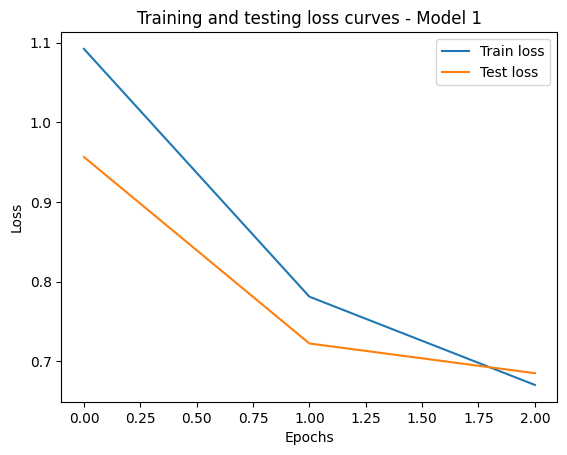

In [29]:
# teste pessoal -> imprimo o gráfico mostrando a curva de aprendizado do modelo
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and testing loss curves - Model 1")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

A partir do gráfico acima, é possível perceber que mesmo tornando o modelo mais complexo, o problema de overfitting se manteve. Isso é evidente pelo fato do train loss diminuir mais rápido que o test loss, ao ponto deste continuar relativamente estável enquanto aquele diminui rapidamente

*Model 2: Construindo uma Rede Neural Convolucional (Convolutional Neural Network - CNN)*

Como as abordagens acima não foram satisfatórias e causaram overfitting, vamos testar um novo modelo que seja capaz de melhorar os resultados, ao mesmo tempo que não produz overfitting. Para tal, usaremos uma Rede Neural Convolucional (Convolutional Neural Network) por conta de suas propriedades especialmente úteis ao tratamento de imagens (em especial, a sua capacidade de reduzir a dimensão da entrada e de levar em consideração a proximidade espacial de elementos em uma imagem, ao invés de tratá-los de maneira independente).

In [30]:
# crio uma classe para o modelo 2, que é uma CNN
class FashionMNISTModelV2(nn.Module):
    """
    Arquitetura do modelo é uma cópia de TinyVGG de <https://poloclub.github.io/cnn-explainer/>
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # tamanho do filtro, ou seja, 3x3
                      stride=1, # comprimento da passada, ou seja, o quanto o filtro se move a cada passo
                      padding=1 # para preservar o tamanho original da imagem, é necessário adicionar pixels ao seu redor
                    ), # a saída é um tensor, que é passado para a função de ativação (ReLU)
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # reduz a resolução da imagem pela metade, o seu valor padrão é o mesmo que o do kernel             
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # 7x7 é o tamanho da imagem após a aplicação das convoluções
                      out_features=output_shape)

        )

    def forward(self, x:torch.Tensor):
        x = self.block_1(x)
        # print(x.shape) # para ver o formato da saída após a aplicação do primeiro bloco
        x = self.block_2(x)
        # print(x.shape) # para ver o formato da saída após a aplicação do segundo bloco
        x = self.classifier(x)
        # print(x.shape) # para ver o formato da saída após a aplicação do classificador
        return x
    
# crio uma instância do modelo 2
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # um canal de cor
                                  hidden_units=10, # número de filtros (?)
                                  output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
# crio dados simples apenas para testar a camada nn.Conv2d -> camada convolucional
torch.manual_seed(42)

# crio um batch de amostra com números aleatórios, com o mesmo tamanho de um batch de imagem "oficial"
images = torch.randn(size=(32, 3, 64, 64)) #[batch_size, color_channels, height, width]
test_image = images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_chanels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values: \n {test_image}") # como são 3 cores, é como se fosse uma matriz 3d, em que há 3 matrizes internas (uma para cada cor)

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_chanels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609

In [32]:
# crio uma camada convolucional para aplicar os dados acima, para ver o resultado
torch.manual_seed(42)
torch.backends.nnpack.enabled = False # porque deu o erro Could not initialize NNPACK! Reason: Unsupported hardwar

# crio uma camada convolucional com as mesmas dimensões de TinyVGG
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1, # por conta do stride e do kernel_size, a dimensão final da imagem é de 62x62, enquanto originalmente era de 64x64 
                       padding=0) # se padding é mudado para 1, o resultado gerado passa a ter a dimensão original de 64x64 
# passo os dados da imagem de teste pela camada convolucional que criei
print(conv_layer(test_image).shape)
conv_layer(test_image)

torch.Size([10, 62, 62])


[W213 14:40:14.610672274 NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [33]:
# mudo os elementos para ver o resultado
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=5,
                         stride=2,
                         padding=0)

conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [34]:
# imprimo os parâmetros internos do conv_layer_2
print(conv_layer_2.state_dict()) # há 10 bias, um para cada 

OrderedDict({'weight': tensor([[[[-0.0262, -0.0692, -0.0101, -0.0568, -0.0472],
          [-0.0367, -0.1097,  0.0947,  0.0968, -0.0181],
          [-0.0131, -0.0471, -0.1043, -0.1124,  0.0429],
          [-0.0634, -0.0742, -0.0090, -0.0385, -0.0374],
          [ 0.0037, -0.0245, -0.0398, -0.0553, -0.0940]],

         [[ 0.0968, -0.0462,  0.0306, -0.0401,  0.0094],
          [ 0.1077,  0.0532, -0.1001,  0.0458,  0.1096],
          [ 0.0304,  0.0774,  0.1138, -0.0177,  0.0240],
          [-0.0803, -0.0238,  0.0855,  0.0592, -0.0731],
          [-0.0926, -0.0789, -0.1140, -0.0891, -0.0286]],

         [[ 0.0779,  0.0193, -0.0878, -0.0926,  0.0574],
          [-0.0859, -0.0142,  0.0554, -0.0534, -0.0126],
          [-0.0101, -0.0273, -0.0585, -0.1029, -0.0933],
          [-0.0618,  0.1115, -0.0558, -0.0775,  0.0280],
          [ 0.0318,  0.0633,  0.0878,  0.0643, -0.1145]]],


        [[[ 0.0102,  0.0699, -0.0107, -0.0680,  0.1101],
          [-0.0432, -0.0657, -0.1041,  0.0052,  0.0512],


In [35]:
# imprimo o formato da dimensão dos weight e bias presentes nos tensores de conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]\n")
print(f"conv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


In [36]:
# agora, iremos olhar mais de perto o nn.MaxPool2d usando os dados que criamos

# imprimo a imagem original sem e com as dimensões achatadas
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}") # o 1 aqui se refere à quantidade de canais de cor

# crio uma amostra de camada nn.MaxPooL2d()
max_pool_layer = nn.MaxPool2d(kernel_size=2) # o maxpool divide a dimensão (quantidade de linhas e colunas) pelo tamanho do kernel; ou seja, se kernel=2, a dimensão será dividida pela metade

# passo os dados pela camada de convolução
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# passo o dado resultante pela camada de max pool
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [37]:
# crio um tensor aleatório com dimensões menores do que as presentes nas imagens que geramos
torch.manual_seed(42)
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor: \n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# crio uma camada max pool
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# passo esse tensor pela camada max pool
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor") # a camada de max pool seleciona quais são os valores mais relevantes naquele vetor e descarta o resto, para reduzir a dimensão da matriz e ainda mantê-la representativa da matriz original
print(f"Max pool tenshor shape: {max_pool_tensor.shape}")

Random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tenshor shape: torch.Size([1, 1, 1, 1])


In [38]:
# configuração da função de loss e otimizador para o model_2
loss_fn = nn.CrossEntropyLoss() # já que estamos trabalhando com dados no contexto de classificação multi-classe
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [39]:
# crio as funções de treino e teste para o model_2
torch.manual_seed(42)

# teste pessoal -> crio listas vazias para guardar valores que serão utilizados para plotar um gráfico da taxa de aprendizado do modelo
epoch_count = []
train_loss_values = []
test_loss_values = []

# início da marcação do tempo
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# posso usar as funções que defini para o modelo 1, pois o funcionamento do loop de treino e teste é o mesmo, só muda quais camadas são aplicadas – e isso já está definido no método forward do model_2
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_loss, train_acc = train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_loss, test_acc = test_step(data_loader=test_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    # teste pessoal para guardar as variáveis com o objetivo de ffazer um gráfico da taxa de aprendizado do modelo
    epoch_count.append(epoch)
    train_loss_values.append(train_loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    
train_time_end_on_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, end=train_time_end_on_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59117 | Train accuracy: 78.48%
Test loss: 0.39207 | Test accuracy: 85.81%

Epoch: 1
---------
Train loss: 0.35925 | Train accuracy: 87.20%
Test loss: 0.34665 | Test accuracy: 87.20%

Epoch: 2
---------
Train loss: 0.32371 | Train accuracy: 88.24%
Test loss: 0.32066 | Test accuracy: 88.36%

Train time on cpu: 197.804 seconds


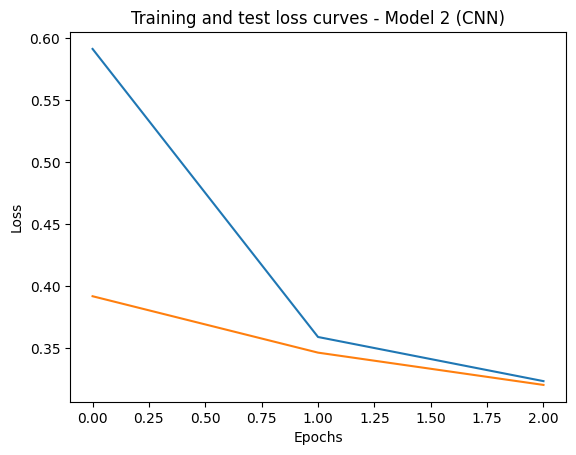

In [40]:
# imprimo a curva de aprendizado do modelo
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves - Model 2 (CNN)")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

Como é possível perceber acima, não houve overfitting no caso do modelo 2.

In [41]:
# uso a função de eval_model para conseguir um dicionário com os resultados do model_2
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32066258788108826,
 'model_acc': 88.35862619808307}

*8. Comparando os resultados e o tempo de treinamento de cada modelo*

In [42]:
# uso a biblioteca pandas para criar um DataFrame contendo os resultados de cada modelo treinado
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results]) # o pandas transforma uma lista de dicionários em uma tabela, nesse caso
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.320663,88.358626


In [43]:
# adicono uma coluna com os valores do tempo gasto de treinamento, para compará-los
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,58.458019
1,FashionMNISTModelV1,0.685001,75.019968,56.868948
2,FashionMNISTModelV2,0.320663,88.358626,197.803781


Com base no DataFrame acima, é possível perceber que o modelo 2, apesar de ser o mais apurado, é o que gasta mais tempo para ser treinado, devido a sua complexidade. A esse fenômeno dá-se o nome de performance-speed tradeoff.

Text(0, 0.5, 'model')

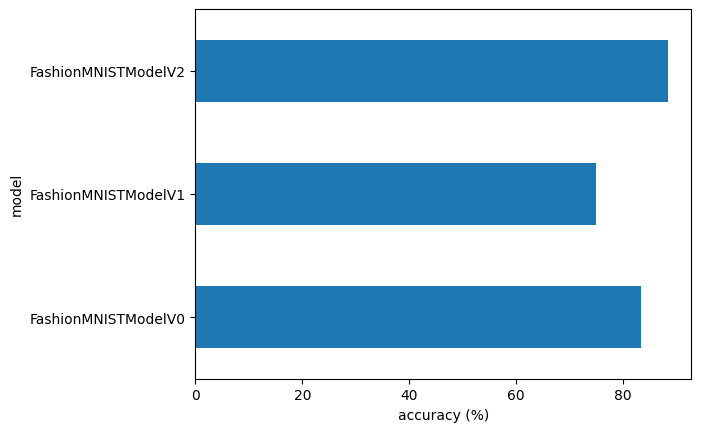

In [44]:
#transformo o dataframe em um gráfico que compara a acurácia de cada modelo
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

*9. Crie e avalie predições aleatórias com o melhor modelo*

In [45]:
# crio uma função que atua como o loop de teste, para avaliar como o modelo 2 lida com dados aleatórios
def make_predictions(model: torch.nn.Module,
                     data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # preparo a amostra(sample)
            sample = torch.unsqueeze(sample, dim=0).to(device) # adiciono uma dimensão extra e envio a amostra para o dispositivo desejado

            # forward pass -> o modelo gera dados crus (raw logits) como saída
            pred_logit = model(sample)

            # transformo o logit em uma predição no formato de probabilidade, entre 0 e 1 (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0) # é necessário aplicar softmax na dimensão de "logits", não na dimensão do batch -> como nesse caso o batch tem tamanho 1, deve-se aplicar o softmax na dim=0

            # levo o pred_prob para a cpu para cálculos posteriores
            pred_probs.append(pred_prob.cpu()) 

    # transformo a lista pred_probs em um tensor
    return torch.stack(pred_probs)

In [ ]:
# gero uma sequência aleatória de imagens para usar nos testes
import random
random.seed(42)
test_samples= [] # amostras aleatórias parte do conjunto de teste
test_labels = [] # rótulos/labels correspondentes às amostras

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# confiro as amostras de teste e os seus labels
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
# faço predições com o modelo 2 utilizando as amostras que gerei aleatoriamente
pred_probs= make_predictions(model=model_2, data=test_samples) 

print(f"First two predictions: {pred_probs[:2]}\n") # vejo as duas primeiras predições na lista
print(f"Prediction probabilities shape: {pred_probs.shape}\n") # teste pessoa para ver quantas predições há na lista -> ou seja, 9 predições com 10 posições cada (cada posição é uma categoria de roupas)
for i in range(len(pred_probs)): # teste pessoal para ver qual é a soma de cada vetor na lista (como softmax foi usado, cada vetor da lista deve ter a soma igual a 1 -> na prática, o arredondamento leva a 1, provavelmente por conta das limitações de cálculo com ponto flutuante)
    if i == 1:
        print(f"Position: {i} | Sum of the elements in the {i}st position of the list: {pred_probs[i].sum()}")
    elif i == 2:
       print(f"Position: {i} | Sum of the elements in the {i}nd position of the list: {pred_probs[i].sum()}")
    elif i == 3:
        print(f"Position: {i} | Sum of the elements in the {i}rd position of the list: {pred_probs[i].sum()}")
    else:
        print(f"Position: {i} | Sum of the elements in the {i}th position of the list: {pred_probs[i].sum()}")

First two predictions: tensor([[1.2820e-08, 2.9531e-09, 4.5407e-09, 3.8096e-09, 2.4890e-10, 9.9998e-01,
         2.4943e-08, 5.2827e-07, 1.7478e-06, 1.7843e-05],
        [1.9337e-02, 5.5290e-01, 3.4178e-04, 1.7209e-01, 1.5030e-01, 3.3654e-05,
         1.0437e-01, 1.7891e-04, 1.8059e-04, 2.6664e-04]])

Prediction probabilities shape: torch.Size([9, 10])

Position: 0 | Sum of the elements in the 0th position of the list: 1.0
Position: 1 | Sum of the elements in the 1st position of the list: 1.0
Position: 2 | Sum of the elements in the 2nd position of the list: 1.0000001192092896
Position: 3 | Sum of the elements in the 3rd position of the list: 0.9999999403953552
Position: 4 | Sum of the elements in the 4th position of the list: 0.9999999403953552
Position: 5 | Sum of the elements in the 5th position of the list: 1.0000001192092896
Position: 6 | Sum of the elements in the 6th position of the list: 1.0
Position: 7 | Sum of the elements in the 7th position of the list: 0.9999999403953552
P

In [ ]:
# transformo essas predições no formato de probabilidade nos rótulos/labels por meio do argmax (que seleciona qual é posição com maior elemento do tensor)
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [49]:
# as nossas predições estão iguais aos rótulos/labels do conjunto de teste?
print(f"Test labels: {test_labels} | Predicted classes: {pred_classes}")

Test labels: [5, 1, 7, 4, 3, 0, 4, 7, 1] | Predicted classes: tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])


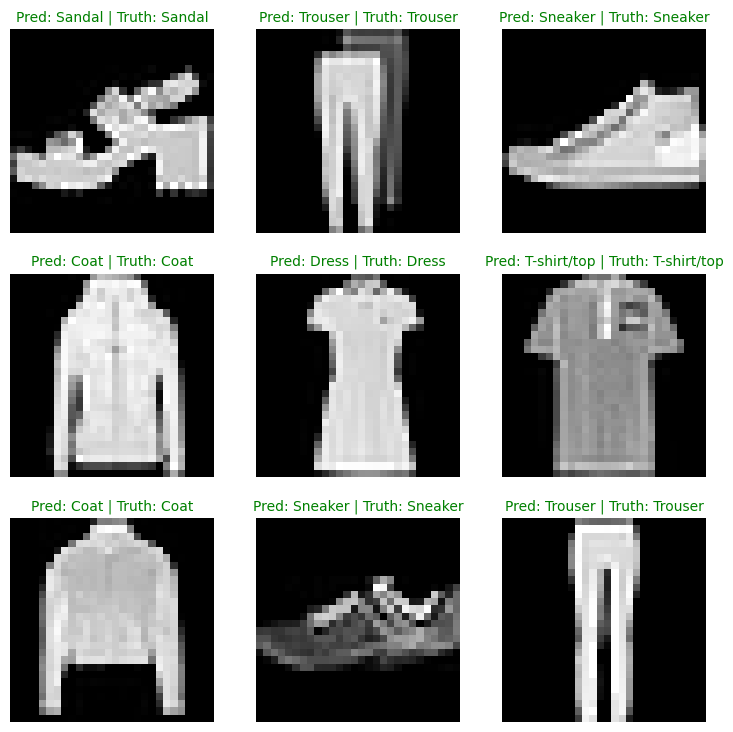

In [69]:
# ploto as predições
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples): # i recebe o índice advindo de enumerate
    # crio um subplot
    plt.subplot(nrows, ncols, i+1)

    # ploto a imagem da amostra
    plt.imshow(sample.squeeze(), cmap="gray")

    # encontro o rótulo predito associado a imagem
    pred_label = class_names[pred_classes[i]]

    # encontro o rótulo verdadeiro associado a imagem
    truth_label = class_names[test_labels[i]]

    # crio o título da imagem sendo plotada
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # confiro se a predição é igual ao rótulo verdadeiro e mudo a cor do título com base nisso
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # texto verde/green se a predição estiver correta
    else:
        plt.title(title_text, fontsize=10, c="r") # texto vermelho/red se a predição estiver errada

    plt.axis(False);

*10. Fazendo uma matriz de confusão (confusion matrix) para avaliações adicionais de predições*

Passo 1: realizo predições com o modelo desejado.

In [75]:
# Passo 1: faço predições com o modelo 2, para utilizá-las na confusion matrix

# importo tqdm para utilizar a barra de progresso
from tqdm.auto import tqdm

# começo o loop de avaliação (teste)
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        # envio os dados e os rótulos para o dispositivo sendo utilizado
        X, y = X.to(device), y.to(device)

        # realizo o forward pass
        y_logit = model_2(X)

        # transformo os logits em predições no formato probabilístico e dessas, escolho a maior (a maior probabilidade corresponde à classe com maior correspondência)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

        # mando as predições para a CPU para avaliá-las
        y_preds.append(y_pred.cpu())

# concateno a lista de predições em um tensor
y_pred_tensor = torch.cat(y_preds)


Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

Passo 2: Faço uma confusion matrix usando torchmetrics.ConfusionMatrix
Passo 3: Imprimo a matriz usando mlxtend.plotting.plot_confusion_matrix()

In [76]:
# confiro se torchmetrics.ConfusionMatrix já está instalado, se não estiver, instalo-o
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except ImportError:
    %pip install -q torchmetrics -U mlxtend
    import torchmetrics
    import mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


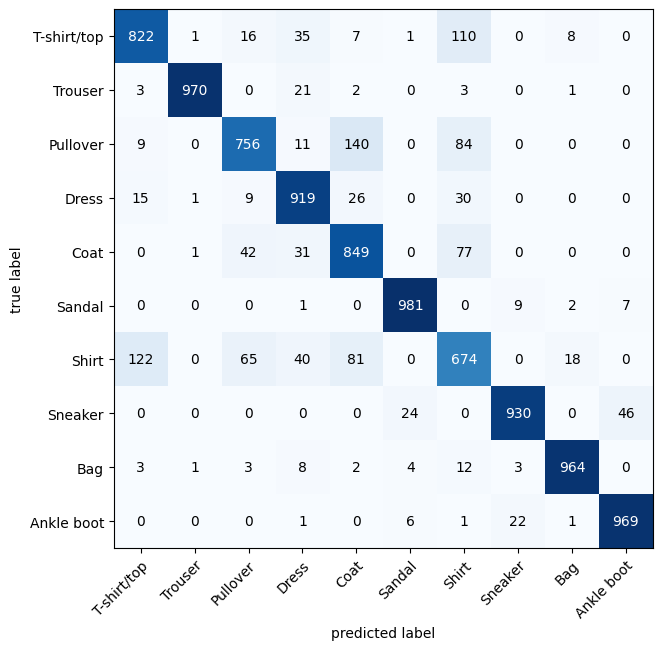

In [77]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Passo 2: crio uma instância da confusion matrix e configuro-a
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Passo 3: Ploto a confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # transformo o tensor para numpy pois o matplotlib prefere usar numpy
    class_names=class_names, # transformo os rótulos das linhas e colunas em nomes das classes
    figsize=(10,7)
);

A partir da matriz de confusão acima, é possível perceber o quão corretamente o modelo 2 prediz cada classes com base em sua classificação real. Além disso, pode-se observar também onde o modelo mais se equivoca e confunde as classificações – como, por exemplo, no caso de "shirt" em que 122 casos o modelo se confundiu e classificou como "T-shirt/top" (categorias bem similares).

*11. Salvando e carregando o modelo com melhor performance*

In [79]:
from pathlib import Path

# crio um diretório para o modelo -> https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # cria diretórios-pai se necessário
                 exist_ok=True # se o diretório já existe, não dá erro
                 )

# crio o caminho para salvar o modelo
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# salvo o dicionário de estado do modelo
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # ao salvar apenas o state_dict(), apenas os parâmetros aprendidos são salvos
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [80]:
# crio uma nova instância do modelo 2, pois irei conferir se os resultados são iguais
# ao carregar o estado do modelo a uma nova instância dele, é necessário que os hiperparâmetros (quantidade de camadas) sejam os mesmos
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)

# carrego o estado do modelo ao loaded_model_2
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# mando o novo modelo para o dispositivo desejado (GPU se existir)
loaded_model_2 = loaded_model_2.to(device)

/tmp/ipykernel_22955/2336772225.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [82]:
# avalio o novo modelo para ver se os resultados são os mesmos
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

print(f"Loaded model 2 results: {loaded_model_2_results}\nOriginal model 2 results: {model_2_results}")

Loaded model 2 results: {'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32066258788108826, 'model_acc': 88.35862619808307}
Original model 2 results: {'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32066258788108826, 'model_acc': 88.35862619808307}


In [83]:
# confiro se os dois tensores têm o resultado próximo entre si ou não usando torch.isclose()
torch.isclose(torch.tensor(model_2_results["model_loss"]), # comparo a loss de cada modelo
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # tolerância absoluta
              rtol=0.0001 # tolerância relativa
              )

tensor(True)